# WeatherPy
----
Trends

The correlation between max temperatures and proximity to the equator is stronger in the Southern Hemisphere than the Northern Hemisphere
The correlation between humidity and proximity to the equator is minimal
There is virtually no correlation between wind speed and proximity to the equator

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

525752cd2c3a9f86b0ffe6ffaf46b8d9


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units=imperial&q="

data_dic = {
            "City": [],
            "Latitude": [],
            "Longitude": [],
            "Max Temp": [],
            "Humidity": [],
            "Cloudiness": [],
            "Wind Speed": [],
            "Country": []
           }
print('Begining data retrieval')

counter = 1
for city in cities:
    try:
        resp_json = requests.get(base_url + city).json()
        data_dic['City'].append(resp_json['name'])
        data_dic['Latitude'].append(resp_json['coord']['lat'])
        data_dic['Longitude'].append(resp_json['coord']['lon'])
        data_dic['Max Temp'].append(resp_json['main']['temp_max'])
        data_dic['Humidity'].append(resp_json['main']['humidity'])
        data_dic['Cloudiness'].append(resp_json['clouds']['all'])
        data_dic['Wind Speed'].append(resp_json['wind']['speed'])
        data_dic['Country'].append(resp_json['sys']['country'])
        print(f"City Name: {city}. ID: {counter}")
        counter +=1
    except KeyError:
        print("counldn't find city")
        cities.remove(city)
        

Begining data retrieval
City Name: mukhen. ID: 1
City Name: atar. ID: 2
City Name: nikolskoye. ID: 3
City Name: leona vicario. ID: 4
City Name: chokurdakh. ID: 5
City Name: haines junction. ID: 6
City Name: samarai. ID: 7
City Name: anadyr. ID: 8
City Name: port alfred. ID: 9
City Name: ushuaia. ID: 10
City Name: boshnyakovo. ID: 11
City Name: caravelas. ID: 12
City Name: kavieng. ID: 13
City Name: escanaba. ID: 14
City Name: dikson. ID: 15
City Name: quartucciu. ID: 16
City Name: huilong. ID: 17
City Name: gamba. ID: 18
City Name: rikitea. ID: 19
City Name: provideniya. ID: 20
City Name: ribeira grande. ID: 21
City Name: vanavara. ID: 22
City Name: tiksi. ID: 23
City Name: bambous virieux. ID: 24
City Name: fairbanks. ID: 25
City Name: busselton. ID: 26
City Name: bengkulu. ID: 27
City Name: punta arenas. ID: 28
City Name: cheyenne. ID: 29
City Name: albany. ID: 30
City Name: georgetown. ID: 31
City Name: pevek. ID: 32
City Name: klaksvik. ID: 33
City Name: da lat. ID: 34
City Name: c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
data_df = pd.DataFrame(data_dic)
print(len(data_df))
data_df.head()

567


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mukhen,48.10,136.10,67.50,80,3,1.10,RU
1,Atar,20.52,-13.05,98.58,15,2,5.93,MR
2,Nikolskoye,59.70,30.79,59.00,77,40,13.42,RU
3,Leona Vicario,20.97,-87.19,89.60,66,20,13.87,MX
4,Chokurdakh,70.63,147.92,52.95,40,34,9.64,RU


In [13]:
#export csv
data_df.to_csv('WeatherPy.csv',index=False)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Mukhen,48.10,136.10,67.50,80,3,1.10,RU
1,Atar,20.52,-13.05,98.58,15,2,5.93,MR
2,Nikolskoye,59.70,30.79,59.00,77,40,13.42,RU
3,Leona Vicario,20.97,-87.19,89.60,66,20,13.87,MX
4,Chokurdakh,70.63,147.92,52.95,40,34,9.64,RU
...,...,...,...,...,...,...,...,...
562,Half Moon Bay,37.46,-122.43,86.00,39,5,9.17,US
563,Tiarei,-17.53,-149.33,80.60,61,20,10.29,PF
564,Scarborough,54.28,-0.40,57.00,81,49,4.65,GB
565,Karasburg,-28.02,18.75,51.46,40,0,6.31,NA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
too_humid = data_df.loc[data_df['Humidity'] >100]
print(data_df['Humidity'].max())
len(too_humid)

100


0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

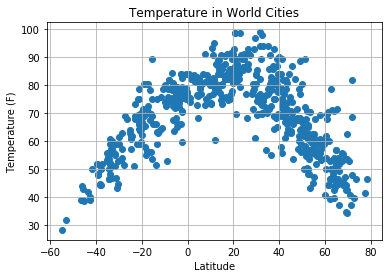

In [29]:
plt.scatter(data_df["Latitude"], data_df["Max Temp"], marker = "o")
plt.title('Temperature in World Cities')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("Temp.png")
plt.show()

## Latitude vs. Humidity Plot

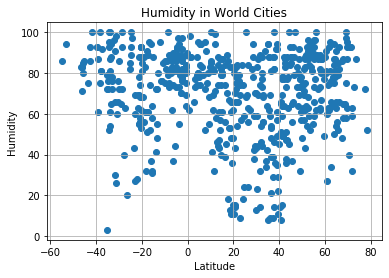

In [30]:
plt.scatter(data_df["Latitude"], data_df["Humidity"], marker = "o")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

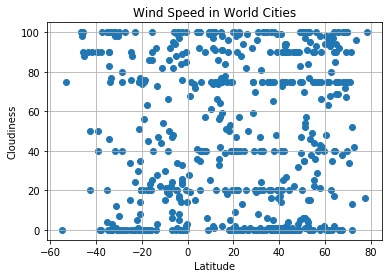

In [31]:
plt.scatter(data_df["Latitude"], data_df["Cloudiness"], marker = "o")
plt.title("Wind Speed in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

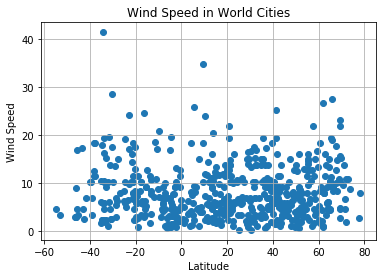

In [33]:
plt.scatter(data_df["Latitude"], data_df["Wind Speed"], marker = "o")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern = data_df.loc[data_df['Latitude']>0]
southern=data_df.loc[data_df['Latitude']<0]
southern.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
6,Samarai,-10.62,150.67,78.58,85,54,17.16,PG
8,Port Alfred,-33.59,26.89,55.99,88,0,1.99,ZA
9,Ushuaia,-54.80,-68.30,28.40,86,0,4.70,AR
11,Caravelas,-17.71,-39.25,71.62,91,63,3.42,BR
12,Kavieng,-2.57,150.80,82.62,76,33,10.25,PG


In [37]:
def regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, (0,0.2), xycoords='axes fraction', fontsize = 12, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5758164381158515


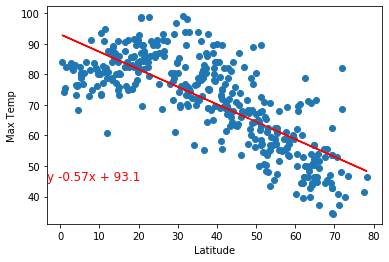

In [38]:
x = northern['Latitude']
y = northern['Max Temp']
y_label = "Max Temp"
regression()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7360472310766178


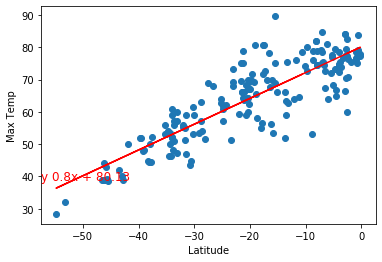

In [39]:
x = southern['Latitude']
y = southern['Max Temp']
y_label = "Max Temp"
regression()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010107605290169745


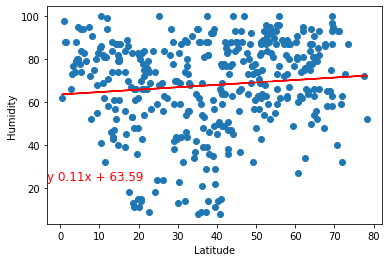

In [40]:
x = northern['Latitude']
y = northern['Humidity']
y_label = "Humidity"
regression()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.756887150721441e-05


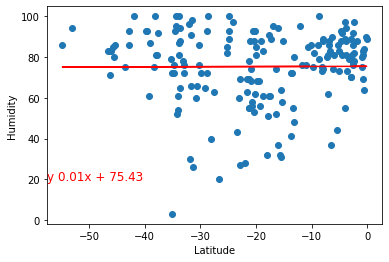

In [41]:
x = southern['Latitude']
y = southern['Humidity']
y_label = "Humidity"
regression()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020055226077463485


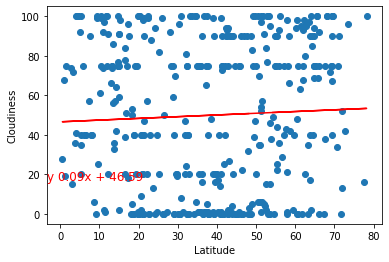

In [43]:
x = northern['Latitude']
y = northern['Cloudiness']
y_label = "Cloudiness"
regression()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02328599209942113


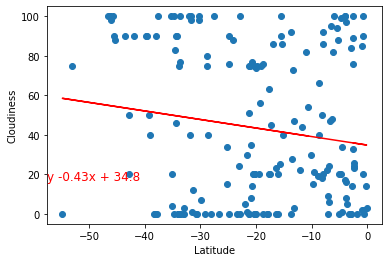

In [44]:
x = southern['Latitude']
y = southern['Cloudiness']
y_label = "Cloudiness"
regression()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006170281839436313


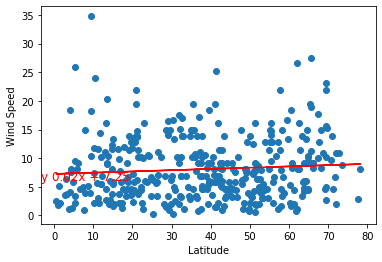

In [45]:
x = northern['Latitude']
y = northern['Wind Speed']
y_label = "Wind Speed"
regression()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03178653966886008


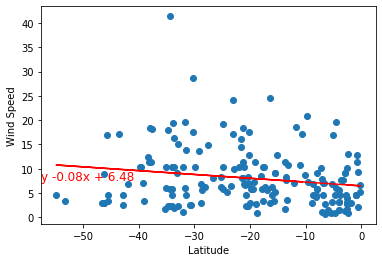

In [46]:
x = southern['Latitude']
y = southern['Wind Speed']
y_label = "Wind Speed"
regression()